Here we will run simple regression models on our dataset.

In [1]:
#importing libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn import metrics

#getting transformed data
data = pd.read_csv('transformed_data.csv')
print(data.columns)

Index(['team', 'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive',
       'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers',
       'department_finishing ', 'actual_productivity', 'day', 'quarter_num',
       'department', 'idle_time?', 'idle_men?'],
      dtype='object')


In [2]:
#visualizing the data
def visualize(expected, predicted, title):
    plt.scatter(expected, predicted)
    plt.xlabel("Actual Productivity")
    plt.ylabel("Predicted Productivity")
    plt.title("Actual vs Predicted Productivity" + title)
    plt.show()

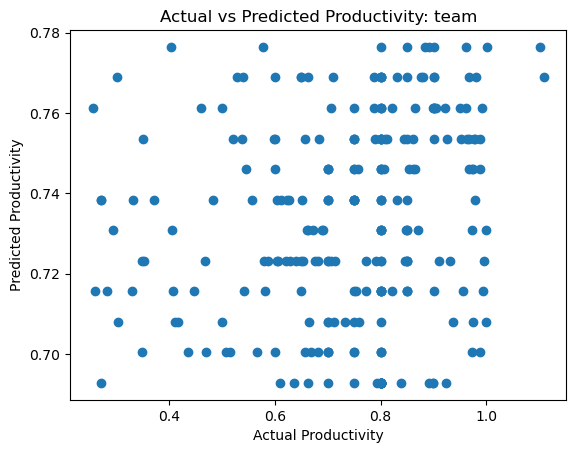

Mean Squared Error: 0.030417673091158032
Mean Absolute Error: 0.13608577564062663
R-squared: 0.025104839792222


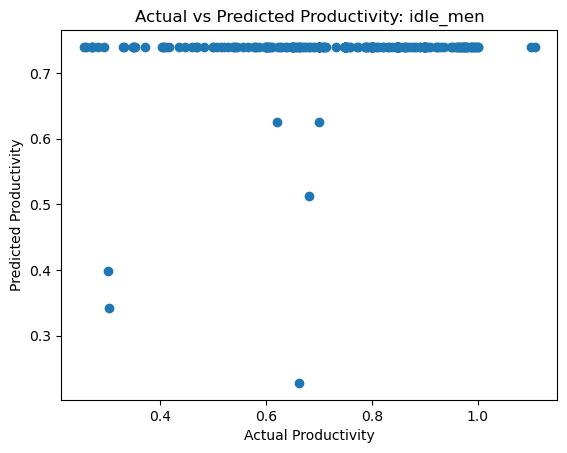

Mean Squared Error: 0.03052773092138352
Mean Absolute Error: 0.1359521650130683
R-squared: 0.02157745471880601


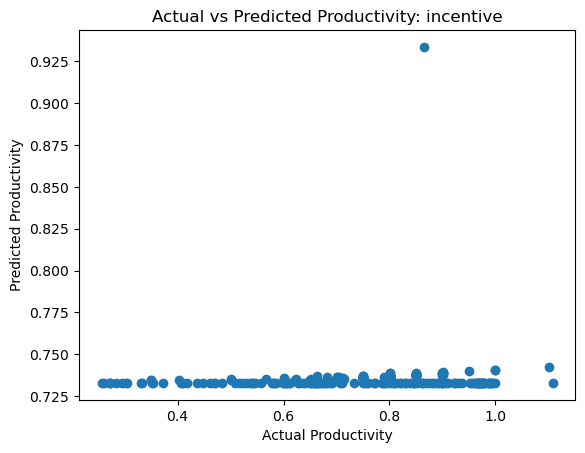

Mean Squared Error: 0.030956023420354164
Mean Absolute Error: 0.13739788618497709
R-squared: 0.007850557097529798


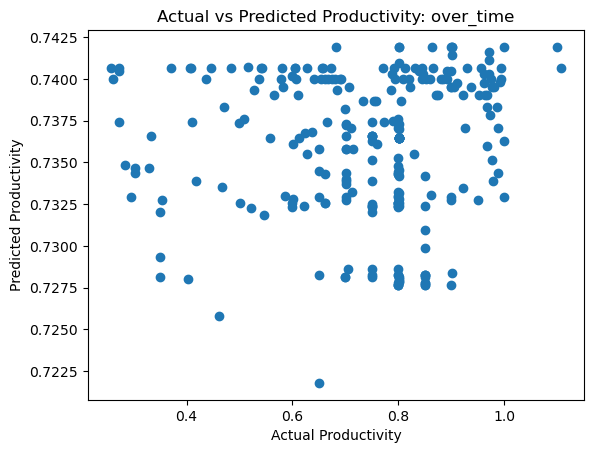

Mean Squared Error: 0.03113852446880096
Mean Absolute Error: 0.1383110780177083
R-squared: 0.0020013460704264574


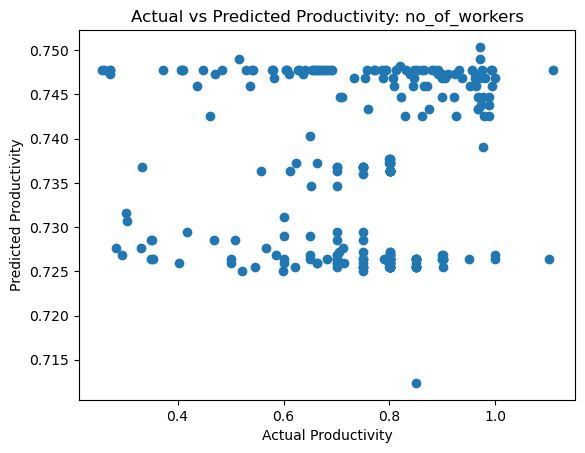

Mean Squared Error: 0.031158681930960275
Mean Absolute Error: 0.13846852168207446
R-squared: 0.0013552936178836683


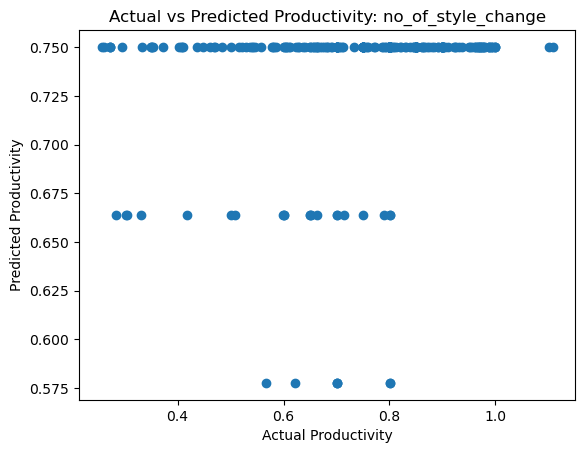

Mean Squared Error: 0.02994818339003443
Mean Absolute Error: 0.13278864581557628
R-squared: 0.04015211957661302


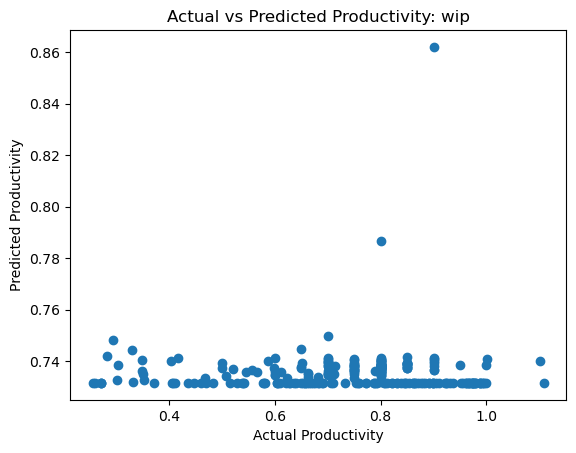

Mean Squared Error: 0.03118075914797224
Mean Absolute Error: 0.13741322211586537
R-squared: 0.0006477124708537119


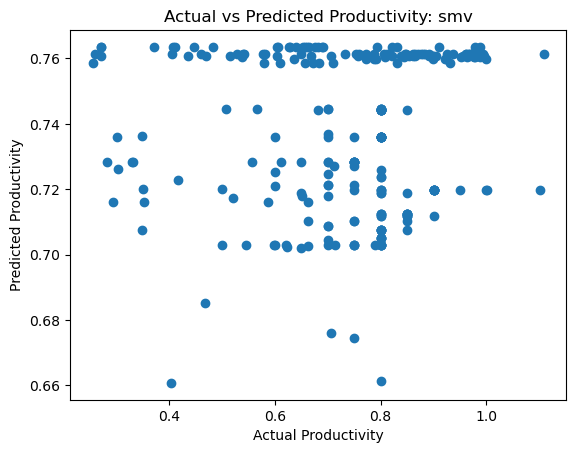

Mean Squared Error: 0.03107967101598525
Mean Absolute Error: 0.13854928451559453
R-squared: 0.003887616139133021


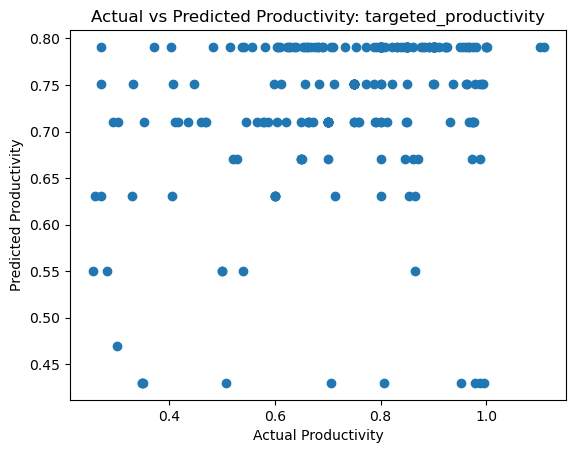

Mean Squared Error: 0.029186038061600344
Mean Absolute Error: 0.11896153879716473
R-squared: 0.06457909628316916


In [8]:
#Univariate Regression for each continuous variable

variable_names = ['team', 'idle_men', 'incentive', 'over_time', 'no_of_workers', 'no_of_style_change', 'wip', 'smv', 'targeted_productivity']
linear_regression = LinearRegression()
for variable in variable_names:
    X_train, X_test, y_train, y_test = train_test_split(
    data[variable].values.reshape(-1, 1), data.actual_productivity.values, random_state=11)
    linear_regression.fit(X=X_train, y=y_train)
    predicted_workers = linear_regression.predict(X_test)
    expected_workers = y_test
    #Now running the regression on the number of workers
    visualize(expected_workers, predicted_workers, ': ' + variable)

    print('Mean Squared Error:', metrics.mean_squared_error(expected_workers, predicted_workers))
    print('Mean Absolute Error:', metrics.mean_absolute_error(expected_workers, predicted_workers))
    print('R-squared:', metrics.r2_score(expected_workers, predicted_workers))


Clearly the model is very inaccurate which is expected since we are using just one variable. Targeted Productivity had the highest r2 score at 0.06458 while wip had the lowest at 0.00065.

Mean Squared Error: 0.02523010139976111
Mean Absolute Error: 0.11525809560058341
R-squared: 0.18663785941433797


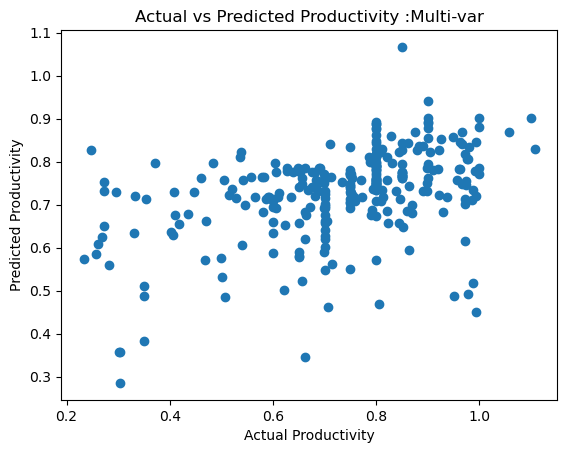

In [80]:
#Multivariate Regression
data = pd.read_csv('transformed_data.csv')
# print(data.columns)

X = data[['team', 'idle_men', 'incentive', 'over_time', 'no_of_workers', 'no_of_style_change', 'wip', 'smv', 'targeted_productivity']] #all integer data points
Y = data[['actual_productivity']] #target value

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3,random_state=11)


model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('R-squared:', metrics.r2_score(y_test, y_pred))

visualize(y_test, y_pred, ' :Multi-var')